## Practice notebook for multivariate analysis using NHANES data
This notebook shows some of the knowleghe adcquire duirng my "Data and Visaulization with Pythn" course. Here I performed some multivariate analyses using the  the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study data.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

#To see all the columns in the summary I will use this code:
pd.set_option('display.max_columns', 100)
da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [22]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

**1.1.** Scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2)

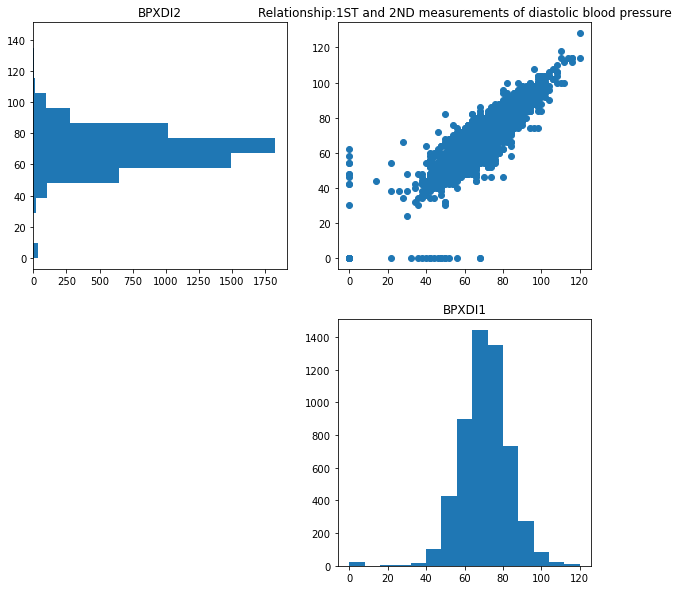

In [23]:
dbp1 = da['BPXDI1']
dbp2 = da['BPXDI2']

plt.figure(figsize=(10,10)) #this means make my figure 10x10
plt.subplot(2,2,2)
plt.scatter(x = dbp1, y = dbp2)
plt.title('Relationship:1ST and 2ND measurements of diastolic blood pressure')

#Plot the 1st measurements of diastolic blood pressure
plt.subplot(2,2,4) 
plt.hist(x = dbp1, bins = 15)
plt.title('BPXDI1')

#Plot the 2nd measurements of diastolic blood pressure
plt.subplot(2,2,1)
plt.hist(x = dbp2, orientation = "horizontal", bins = 15)
plt.title('BPXDI2')

# Plot the scatterplot
plt.show()

**1.2.** 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

In [24]:
print(da.loc[:, ['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']].dropna().corr())

          BPXSY1    BPXSY2    BPXDI1    BPXDI2
BPXSY1  1.000000  0.962287  0.317497  0.277681
BPXSY2  0.962287  1.000000  0.329843  0.298392
BPXDI1  0.317497  0.329843  1.000000  0.884722
BPXDI2  0.277681  0.298392  0.884722  1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation is almost none. However, the first measure of diastolic blood pressure is "more" related to the repeated measurements of systolic blood pressure than the second measure of diastolic blood pressure:
r (BPXSY1 - BPXDI1) = 0.317497
r (BPXSY2 - BPXDI1) = 0.329843
r (BPXSY1 - BPXDI2) = 0.277681
r (BPXSY2 - BPXDI2) = 0.298392

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

No, the correlation between BPXSY2 to BPXDI2 is 0.298392, and the correlation between BPXSY1 to BPXDI1 is 0.317497.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

**2.1.** Grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. 

In [30]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

Text(0.5, 1.0, 'Relationship: 1st systolic and the 1st diastolic blood pressure measurement')

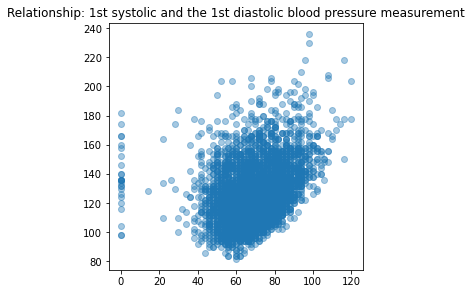

In [43]:
dbx1 = da['BPXSY1']

plt.figure(figsize=(10,10)) #this means make my figure 10x10
plt.subplot(2,2,2)
plt.scatter(x = dbp1, y = dbx1, alpha=0.4)
plt.title('Relationship: 1st systolic and the 1st diastolic blood pressure measurement')

**2.2.** Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

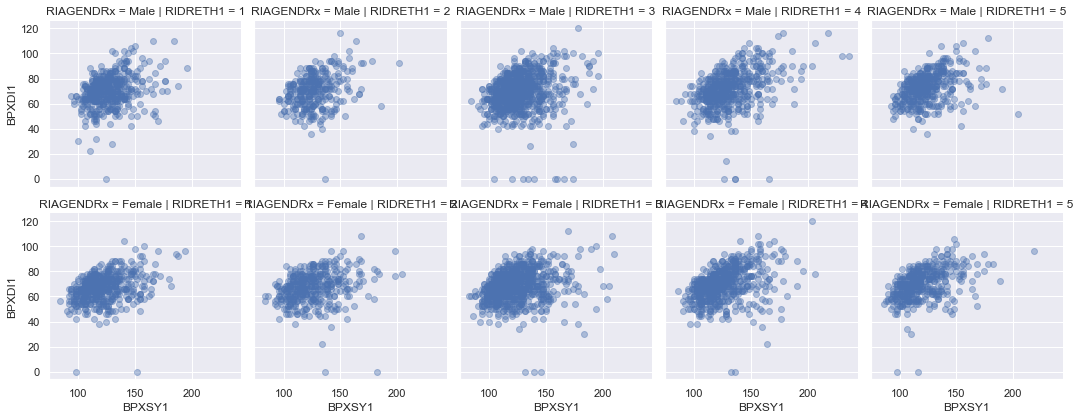

In [52]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.4).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

The blood pressure is stronger in women, and there's a lot of outliers in both gender groups indenfy as Non-Hispanic White and Non-Hispanic Black.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [45]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

/Users/k.vazquez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


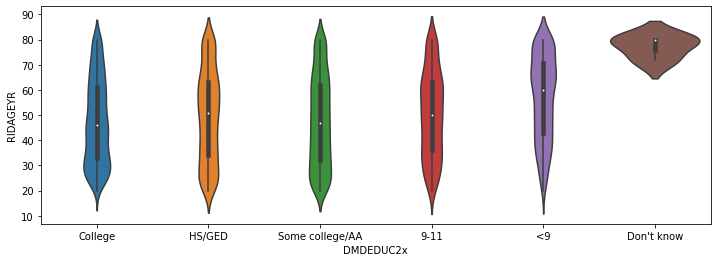

In [46]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

The distribution with high mean (Don't know) is strongly left-skewed, while the other distributions have intermediate mean values. However, the college group is strongly right-skewed with low mean, and the <9 group is strongly left-skewed with low mean.

## Question 4

Use violin plots to compare the distributions of BMI (BMXBMI) within a series of 10-year age bands.  Also stratify these plots by gender.

/Users/k.vazquez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


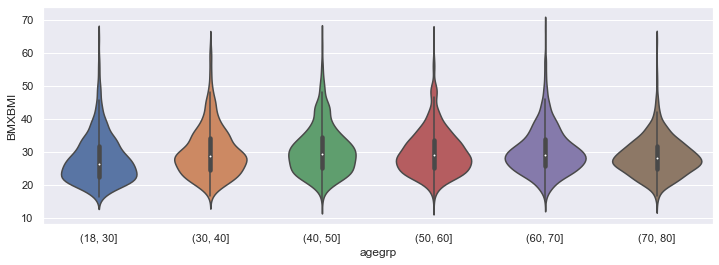

In [54]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 4))
b = sns.violinplot(da.agegrp, da.BMXBMI)

/Users/k.vazquez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


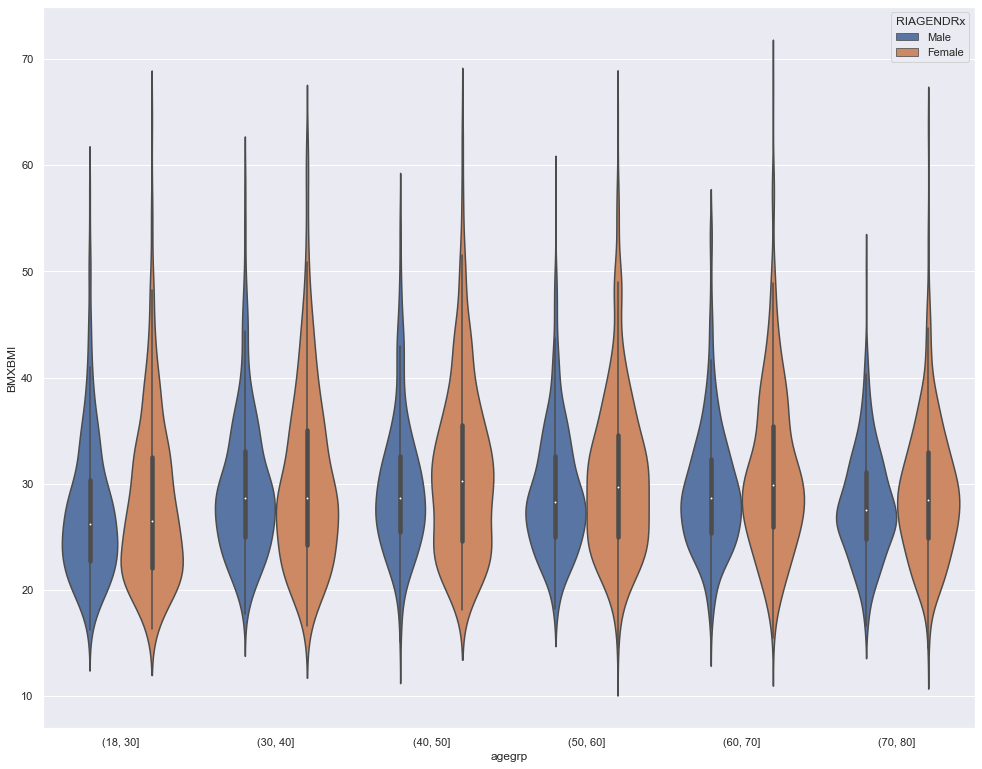

In [60]:
b_gender = sns.violinplot(da.agegrp, da.BMXBMI, hue=da.RIAGENDRx, scale='count')

__Q5a.__ Comment on the trends in BMI across the demographic groups.

Is a trend that women have a higher in all of the age groups. The median trend to be also higher for women except from 18 to 40 years ald where it appears to be quite similiar for both genders. And also we can see a lot of outliers for women at the eag eof 60-70.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [59]:
eth_hins = pd.crosstab(da['RIDRETH1'], da['HIQ210'], margins=True)

# Normalize the frequency table within each ethnic group
ethnicity_groups = eth_hins.index[:-1]
for group in ethnicity_groups:
    eth_hins.loc[group] = eth_hins.loc[group] / eth_hins.loc[group]['All']

# Print the normalized frequency table
print(eth_hins)

HIQ210           1.0          2.0       9.0   All
RIDRETH1                                         
1           0.137982     0.857567  0.004451     1
2           0.128696     0.871304  0.000000     1
3           0.067354     0.931432  0.001214     1
4           0.108654     0.890385  0.000962     1
5           0.081761     0.915723  0.002516     1
All       456.000000  4268.000000  8.000000  4732


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

The ethnic group 3 (Non-Hispanic White) has been the highest rate of being uninsured in the past year.